#IMPORT KAGGLE->COLAB

In [ ]:
!mkdir /root/.kaggle

In [ ]:
!ls /

bin			    etc     media		      root  tools
boot			    home    mnt			      run   usr
content			    lib     NGC-DL-CONTAINER-LICENSE  sbin  var
cuda-keyring_1.0-1_all.deb  lib32   opt			      srv
datalab			    lib64   proc		      sys
dev			    libx32  python-apt		      tmp


In [ ]:
!ls /root # here we cannot see the file as '.'means hidden file information cannot be shown in public

In [ ]:
!mv /content/kaggle.json /root/.kaggle

In [ ]:
!chmod 777 /root/.kaggle/kaggle.json

In [ ]:
!ls /content

sample_data


In [ ]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 89% 106M/119M [00:00<00:00, 219MB/s] 
100% 119M/119M [00:00<00:00, 209MB/s]


In [ ]:
!unzip /content/chest-ctscan-images.zip -d /tmp

Archive:  /content/chest-ctscan-images.zip
  inflating: /tmp/Data/test/adenocarcinoma/000108 (3).png  
  inflating: /tmp/Data/test/adenocarcinoma/000109 (2).png  
  inflating: /tmp/Data/test/adenocarcinoma/000109 (4).png  
  inflating: /tmp/Data/test/adenocarcinoma/000109 (5).png  
  inflating: /tmp/Data/test/adenocarcinoma/000112 (2).png  
  inflating: /tmp/Data/test/adenocarcinoma/000113 (7).png  
  inflating: /tmp/Data/test/adenocarcinoma/000114 (5).png  
  inflating: /tmp/Data/test/adenocarcinoma/000114.png  
  inflating: /tmp/Data/test/adenocarcinoma/000115 (4).png  
  inflating: /tmp/Data/test/adenocarcinoma/000115 (8).png  
  inflating: /tmp/Data/test/adenocarcinoma/000115.png  
  inflating: /tmp/Data/test/adenocarcinoma/000116 (5).png  
  inflating: /tmp/Data/test/adenocarcinoma/000116 (7).png  
  inflating: /tmp/Data/test/adenocarcinoma/000116 (9).png  
  inflating: /tmp/Data/test/adenocarcinoma/000117 (4).png  
  inflating: /tmp/Data/test/adenocarcinoma/000117 (8).png  
  inf

In [ ]:
!mkdir /proj

In [ ]:
!mkdir /proj/cancer

In [ ]:
!mkdir /proj/cancer/train

In [ ]:
!mkdir /proj/cancer/test

In [ ]:
!mkdir /proj/cancer/validate

In [ ]:
import os

In [ ]:
base_dir ='/tmp/Data'

In [ ]:
train_dir = os.path.join(base_dir,'train')

In [ ]:
validation_dir = os.path.join(base_dir, 'valid')

In [ ]:
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_aden = os.path.join(train_dir, '/tmp/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')

In [ ]:
train_lcc = os.path.join(train_dir, '/tmp/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa')

In [ ]:
train_scc = os.path.join(train_dir, '/tmp/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa')

In [ ]:
train_normal = os.path.join(train_dir, '/tmp/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa')

In [ ]:
val_aden = os.path.join(train_dir, '/tmp/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')

In [ ]:
val_lcc = os.path.join(train_dir, '/tmp/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa')

In [ ]:
val_scc = os.path.join(train_dir, '/tmp/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa')

In [ ]:
val_normal = os.path.join(train_dir, '/tmp/Data/valid/normal')

In [ ]:
!cp /tmp/Data/test/adenocarcinoma/000114.png /proj/cancer/test
!cp /tmp/Data/test/large.cell.carcinoma/000108.png /proj/cancer/test
!cp /tmp/Data/test/normal/10.png /proj/cancer/test
!cp /tmp/Data/test/squamous.cell.carcinoma/000111.png /proj/cancer/test

In [ ]:
num_aden_tr = len(os.listdir(train_aden))

In [ ]:
num_lcc_tr = len(os.listdir(train_lcc))

In [ ]:
num_normal_tr = len(os.listdir(train_normal))

In [ ]:
num_scc_tr = len(os.listdir(train_scc))

In [ ]:
num_aden_validate = len(os.listdir(val_aden))

In [ ]:
num_lcc_validate = len(os.listdir(val_lcc))

In [ ]:
num_scc_validate = len(os.listdir(val_scc))

In [ ]:
num_normal_validate = len(os.listdir(val_normal))

In [ ]:
total_train = num_aden_tr+num_lcc_tr+num_normal_tr+num_scc_tr
total_val = num_aden_validate + num_lcc_validate + num_normal_validate + num_scc_validate

In [ ]:
print("Total data in validate",total_val )
print("Total data in train",total_train )

Total data in test 72
Total data in train 620


#MODEL BUILDING

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
basemodel = VGG19(weights='imagenet', include_top= False, input_shape=(128,128,3) )
for layer in basemodel.layers[:14]:                    #freezing the first 14 layers by setting trainable to false
    layer.trainable = False
basemodel.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
tmp = [layer for layer in basemodel.layers]

[layer for layer in basemodel.layers]

In [ ]:
tmp

In [ ]:
layer_dict= dict ([(layer.name, layer) for layer in basemodel.layers])  #CNN layers

In [ ]:
layer_dict  #names in kv-pair #key-blovk name, value-address

{'input_1': <keras.engine.input_layer.InputLayer at 0x7e0089b20c10>,
 'block1_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7dfffecb7940>,
 'block1_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7dfffecb7fd0>,
 'block1_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7dfffeb810f0>,
 'block2_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7dfffeb81ea0>,
 'block2_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7dfffeb82b90>,
 'block2_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7dfffeb83c10>,
 'block3_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7dfffeb83520>,
 'block3_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7dfff2328b50>,
 'block3_conv3': <keras.layers.convolutional.conv2d.Conv2D at 0x7dfffeb81f90>,
 'block3_conv4': <keras.layers.convolutional.conv2d.Conv2D at 0x7dfffeb81ae0>,
 'block3_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7dfff232a740>,
 'block4_conv1': <keras.layers.convolutional

In [ ]:
layer_dict['block4_conv1']  #printing address at given key

In [ ]:
x = layer_dict['block4_pool'].output

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, \
Dropout, Flatten, Dense, Activation, BatchNormalization

In [ ]:
x = Conv2D(filters=64, kernel_size=(4, 4), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

#adding secong convolution layer

x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)



#x = Dense(200, activation='relu')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.25)(x)



x = Dense(4, activation='softmax')(x)   #4 since we have 4 classification labels


In [ ]:
from keras.models import Model

In [ ]:
model = Model(basemodel.input, x)

In [ ]:
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [ ]:
BATCH_SIZE= 32
IMG_SHAPE= 128
Image_Width=128
Image_Height=128
Image_size=(Image_Width,Image_Height)
Image_Channel=3


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',     #categorical crossentropy simce we have more than 2 labels
    metrics=['accuracy']
)


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 11)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.01,restore_best_weights=True)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:

import matplotlib.pyplot as plt
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random, os

In [ ]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE))

Found 613 images belonging to 4 classes.


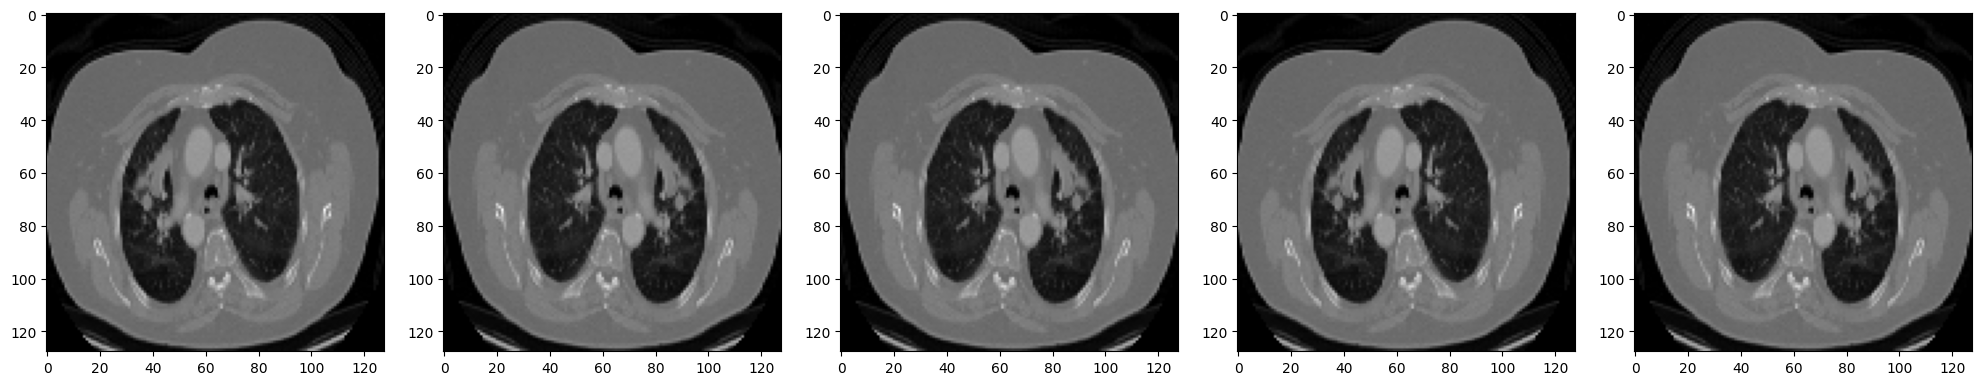

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = BATCH_SIZE, directory = validation_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE), class_mode = 'categorical')
test_generator = image_gen_val.flow_from_directory(
  directory= test_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),

    class_mode='categorical',
)

Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


#TRAINING MODEL

In [ ]:
epochs = 10
history = model.fit(train_data_gen,
                              epochs = epochs,
                              validation_data = val_data_gen,
                              validation_steps=total_val//BATCH_SIZE,
                              steps_per_epoch = total_train//BATCH_SIZE,
                              callbacks = callbacks)

Epoch 1/10
19/19 [==============================] - 4s 194ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.6783 - val_accuracy: 0.8906 - lr: 1.0000e-04
Epoch 2/10
19/19 [==============================] - 3s 159ms/step - loss: 0.0184 - accuracy: 0.9948 - val_loss: 0.7628 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 3/10
19/19 [==============================] - 3s 158ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6786 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 4/10
19/19 [==============================] - 4s 206ms/step - loss: 0.0133 - accuracy: 0.9931 - val_loss: 0.6319 - val_accuracy: 0.8906 - lr: 1.0000e-04
Epoch 5/10
19/19 [==============================] - 3s 172ms/step - loss: 0.0090 - accuracy: 0.9966 - val_loss: 0.5397 - val_accuracy: 0.8906 - lr: 1.0000e-04
Epoch 6/10
19/19 [==============================] - 3s 174ms/step - loss: 0.0148 - accuracy: 0.9966 - val_loss: 0.5961 - val_accuracy: 0.8906 - lr: 1.0000e-04
Epoch 7/10
19/19 [============================

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

10/10 [==============================] - 2s 156ms/step - loss: 1.5725 - accuracy: 0.7524
Test Accuracy: 75.24%


ignore score above it was just further experimentation

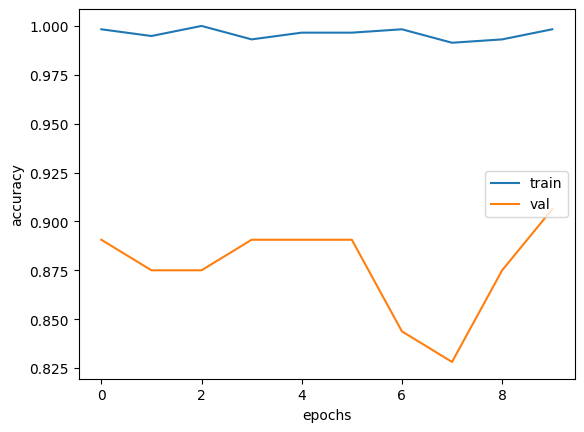

In [ ]:
plt.plot(history.history['accuracy'], label = 'train',)
plt.plot(history.history['val_accuracy'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

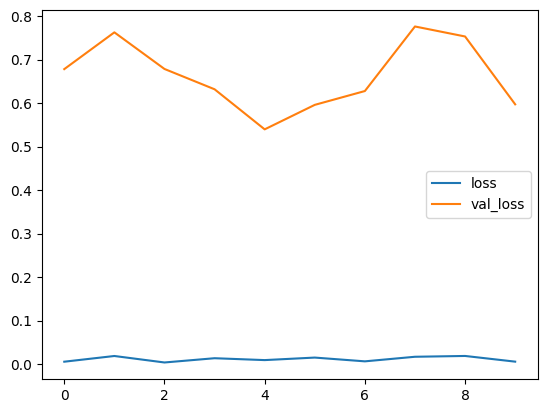

In [ ]:
plt.plot(history.history["loss"], label ="loss")
plt.plot(history.history["val_loss"], label ="val_loss")
plt.legend()
plt.show()

#SAVING MODEL

In [ ]:
model.save("/content/lungdisease7_model.h5")

MODEL5 - test accuracy 75%
MODEL6 - test accuracy 76%
MODEL7 - test accuracy 78%

using model 7 that has 99% training accuracy, 88% validation accuracy , 78% test accuracy

#TESTING THE MODEL ON TEST SET USING MODEL 7

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
!ls /content

chest-ctscan-images.zip  lungdisease6_model.h5	sample_data
lungdisease5_model.h5	 lungdisease7_model.h5


In [ ]:
model=load_model('/content/lungdisease7_model.h5')

In [ ]:
# Defining the class labels
class_labels = ['adenocarcinoma', 'large_cell_carcinoma', 'normal', 'sqamous_cell_carcinoma']

In [ ]:
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the pixel values (assuming the original model was trained with normalized data)
    return img_array

In [ ]:

# Function to make predictions on the input image
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return predicted_class, confidence

#TAKING IMAGES FROM TEST FOLDER AND TESTING THEM

1/1 [==============================] - 0s 23ms/step
Predicted Class: adenocarcinoma
Confidence: 0.8145105


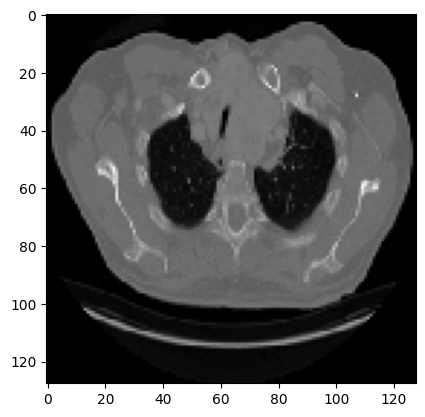

In [ ]:
input_image_path = '/proj/cancer/test/000108.png'
predicted_class, confidence = predict_image(input_image_path)
my_image = load_img('/proj/cancer/test/000108.png', target_size=(128,128))
plt.subplot(1,1,1)
plt.imshow(my_image)
print("Predicted Class:", predicted_class)
print("Confidence:", confidence)

1/1 [==============================] - 0s 22ms/step
Predicted Class: normal
Confidence: 0.9946694


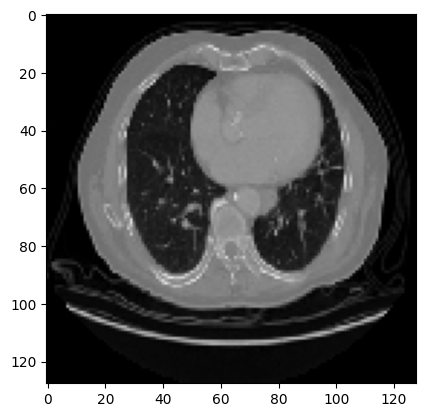

In [ ]:
input_image_path = '/proj/cancer/test/000111.png'
predicted_class, confidence = predict_image(input_image_path)
my_image = load_img('/proj/cancer/test/000111.png', target_size=(128,128))
plt.subplot(1,1,1)
plt.imshow(my_image)
print("Predicted Class:", predicted_class)
print("Confidence:", confidence)

1/1 [==============================] - 0s 26ms/step
Predicted Class: normal
Confidence: 0.9999957


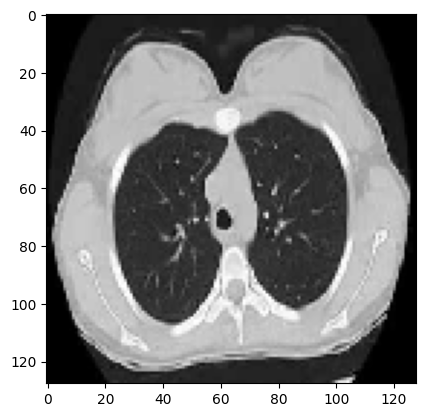

In [ ]:
input_image_path = '/proj/cancer/test/10.png'
predicted_class, confidence = predict_image(input_image_path)
my_image = load_img('/proj/cancer/test/10.png', target_size=(128,128))
plt.subplot(1,1,1)
plt.imshow(my_image)
print("Predicted Class:", predicted_class)
print("Confidence:", confidence)